In [1]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import core
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

# 2.1.1 Implementation of the EM algorithm for GMM

### Note: The GMM class is defined in the core.py file

In [2]:

data = pd.read_csv('SMAI-Dataset-customer-dataset/data.csv')
# data.tail()
data = data.drop('Index',axis=1)
print(data.shape)

# Calculate mean and standard deviation for each feature (column)
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

# Perform normalization
normalized_data = (data - mean) / std
# print(normalized_data)
normalized_data = np.array(normalized_data)

(2000, 7)


### Calculation of clustering assignment parameters for different no. of clusters

#### PCA not applied on dataset

In [3]:
clu_assi = []
for n_clu in [2,3,4,5]:
    gmm = core.MY_GMM()
    means, covarience, weights = gmm.fit(normalized_data, n_clu)
    clu_assi.append(gmm.predict(normalized_data,means, covarience, weights))


c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JANAKSINH\SMAI_Assignments\SMAI_Assignment_2\2_GMM_assi-2\core.py:123: RuntimeWarning: divide by zero encountered in log


### Scatter plots for the different number of clusters for given dataset

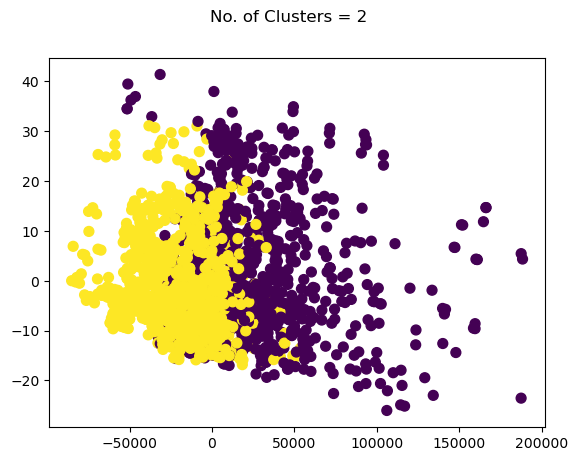

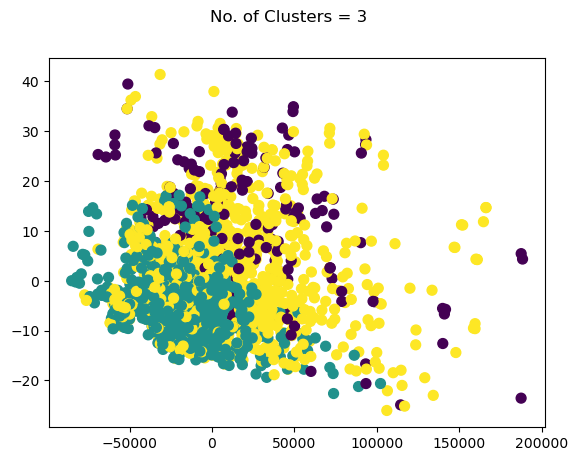

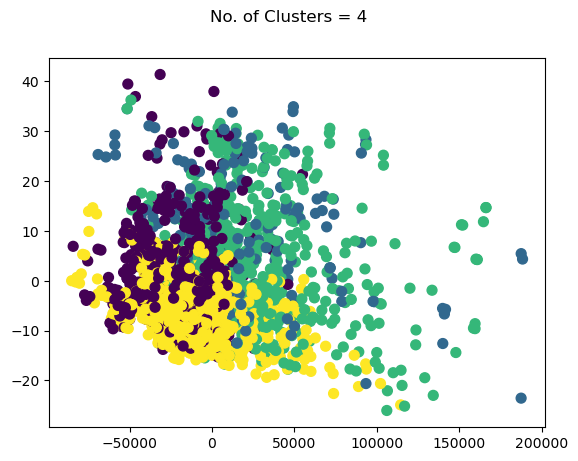

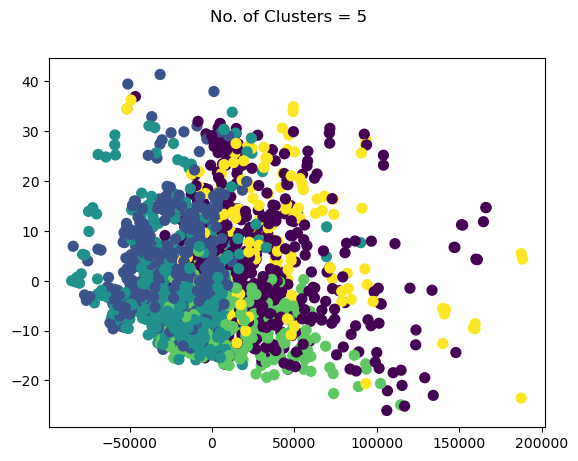

In [4]:

# from sklearn.preprocessing import StandardScaler

pca=PCA(n_components=2)
pca.fit(data)
x_pca = pca.transform(data)
data_d = np.array(x_pca)
cluster_assignments =np.array(clu_assi)
for i in range(4):
    fig = plt.figure()
    fig.suptitle(f'No. of Clusters = {i+2}')
    ax = fig.add_subplot(111)
    scatter = ax.scatter(data_d[:,0], data_d[:,1], c=cluster_assignments[i],s=50,cmap='viridis')


Silhouette score = (b - a) / max(a, b)   
a = Average distance between samples in same clusters.   
b = for all sample calulate the average distance to the samples present in the nearest neighboring cluster.

In [5]:
score = silhouette_score(normalized_data, cluster_assignments[0])
print('Silhouette score for GMM for two clusters  =',score)

Silhouette score for GMM for two clusters  = 0.227060093450105


### PCA applied on the dataset

In [6]:
pca=PCA(n_components=2)
pca.fit(normalized_data)
x_pca = pca.transform(normalized_data)
clu_assi = []
for n_clu in [2,3,4,5]:
    gmm = core.MY_GMM()
    means, covarience, weights = gmm.fit(x_pca, n_clu)
    clu_assi.append(gmm.predict(x_pca,means, covarience, weights))

c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

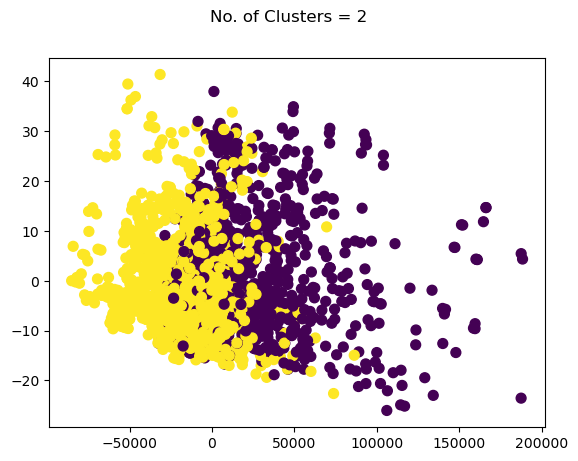

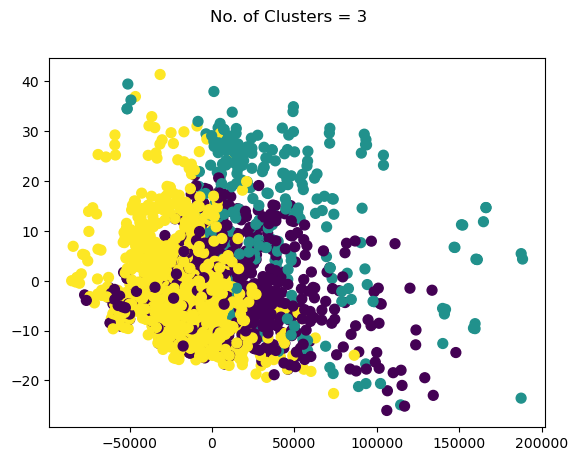

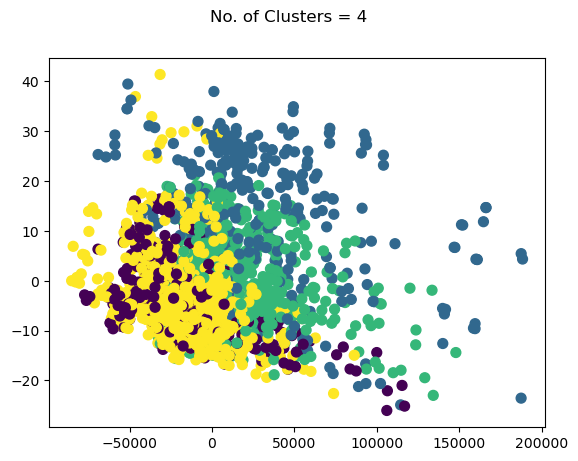

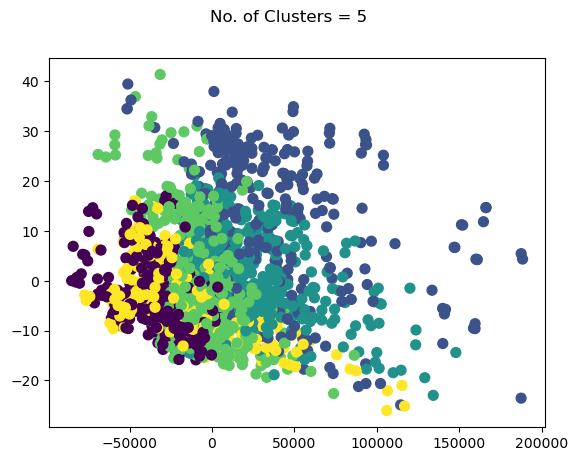

In [7]:
pca=PCA(n_components=2)
pca.fit(data)
x_pca = pca.transform(data)
data_d = np.array(x_pca)
cluster_assignments =np.array(clu_assi)
for i in range(4):
    fig = plt.figure()
    fig.suptitle(f'No. of Clusters = {i+2}')
    ax = fig.add_subplot(111)
    scatter = ax.scatter(data_d[:,0], data_d[:,1], c=cluster_assignments[i],s=50,cmap='viridis')

In [9]:
score = silhouette_score(normalized_data, cluster_assignments[0])
print('Silhouette score for GMM for two clusters  =',score)

Silhouette score for GMM for two clusters  = 0.2512473677978322


Obsevations:        
GMM model run for same dataset for different number of clusters.
From the results shown in above scatter plots the conclusion can be made that Number of cluster = 2 is best possible case for given data.

# 2.1.2 Load wine

In [10]:
wine = load_wine()
data = wine['data']
data = np.array(data)
data_v = pd.DataFrame(data)

# preproceesing of the data
mean = np.mean(data_v, axis=0)
std = np.std(data_v, axis=0)
# Perform normalization
normalized_data = np.array((data_v - mean) / std)
print(' normalized_data shape:',normalized_data.shape)

 normalized_data shape: (178, 13)


## K-means clustering

In [11]:
clust = [1,3,5,7,9,11]
wcss_list = []
for i in clust:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42,max_iter=1000)  
    kmeans.fit(normalized_data)  
    wcss_list.append(kmeans.inertia_)



c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is kno

Text(0, 0.5, 'within-cluster sum of squares')

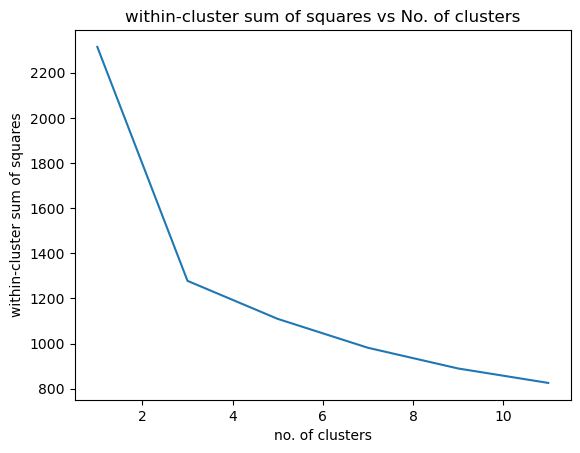

In [12]:
plt.plot(clust,wcss_list)
plt.title('within-cluster sum of squares vs No. of clusters')
plt.xlabel('no. of clusters')
plt.ylabel('within-cluster sum of squares')

Obsevations: In the above plot the ELBO point is detected at no. of clusters = 3.

### Scatter plot of the K-means clusters

In [13]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state= 42)  
kmeans.fit(normalized_data)  
predict = kmeans.fit_predict(normalized_data)
centroids = kmeans.cluster_centers_

c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is kno

Text(0, 0.5, 'Feature 2')

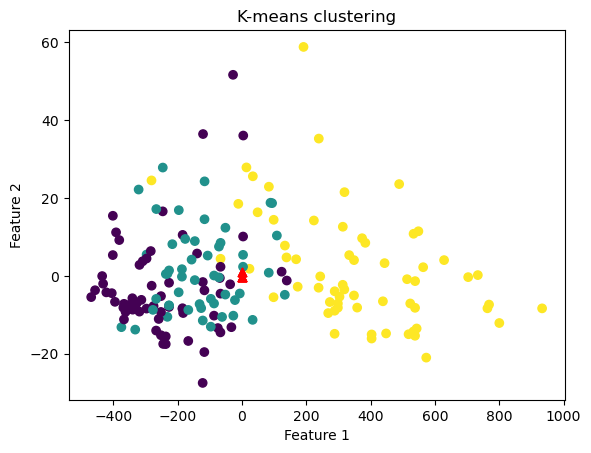

In [14]:
pca=PCA(n_components=2)
pca.fit(data)
x_pca = pca.transform(data)
plt.scatter(x_pca[:,0],x_pca[:,1], c=predict)

for i in range(n_clusters):
  
    plt.scatter(centroids[:,0],centroids[:,1],marker = '^',c = 'red')

plt.title('K-means clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [15]:
score = silhouette_score(normalized_data, predict)
print('Silhouette score for K-means =',score)

Silhouette score for K-means = 0.2848589191898987


#### PCA applied on dataset

Text(0, 0.5, 'Feature 2')

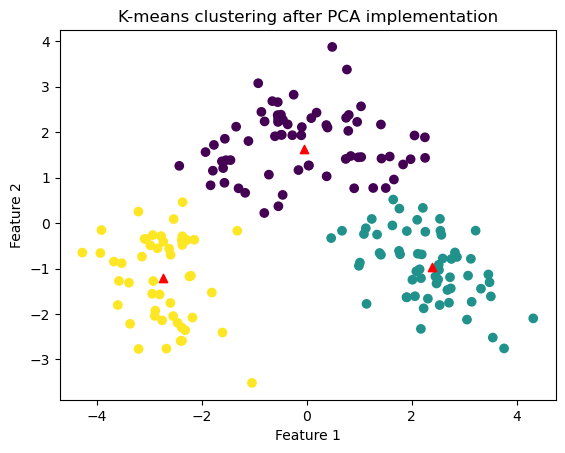

In [19]:
pca=PCA(n_components=2)
pca.fit(normalized_data)
x_pca = pca.transform(normalized_data)
x_pca.shape
#K means
n_clusters = 3
k_m = core.K_means(n_clusters)
clusters, SSE = k_m.fit(x_pca, max_iter=50)
predict = k_m.pred_cluster(x_pca,clusters)

plt.scatter(x_pca[:,0],x_pca[:,1], c=predict)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')

plt.title('K-means clustering after PCA implementation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [20]:
score = silhouette_score(x_pca, predict)
print('Silhouette score for K-means after applying PCA on data=',score)

Silhouette score for K-means after applying PCA on data= 0.5615238075263913


### AIC/BIC for GMM 

In [28]:
clust = [1,2,3,4,5,6,7]
log_l = []
for i in clust:
    gmm = core.MY_GMM()
    means, covarience, weights = gmm.fit(normalized_data, i,max_iter=500)
    log_likelihood = gmm.calculate_log_likelihood(normalized_data, means, covarience, weights)
    log_l.append(log_likelihood)
    
#AIC and BIC calculation
aic = 2*normalized_data.shape[1] - 2*np.array(log_l)
bic = np.log(normalized_data.shape[0])*normalized_data.shape[1] - 2*np.array(log_l)

c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is kno

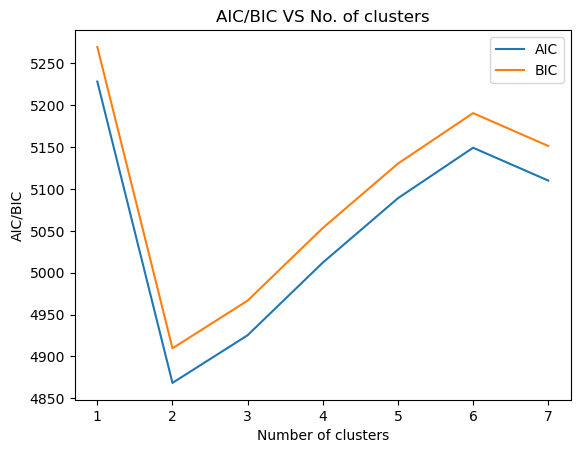

In [29]:
plt.plot(clust,aic,label='AIC')
plt.plot(clust,bic,label='BIC')
plt.xlabel('Number of clusters')
plt.ylabel('AIC/BIC')
plt.title('AIC/BIC VS No. of clusters')
plt.legend()

 In above AIC/BIC plot we can conclude that the number of best possible clusters = 3 (The ELBO point of the graph is at no. of clusters = 3).

### GMM clustering for the best number of clusters 

#### PCA not applied on dataset

c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Feature 2')

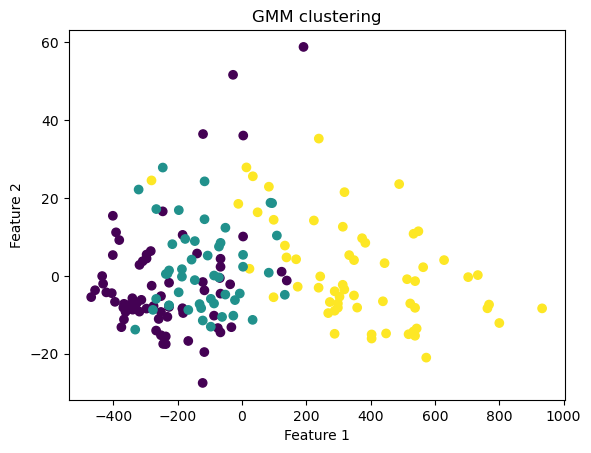

In [34]:
n_clusters = 3
gmm = core.MY_GMM()
means, covarience, weights = gmm.fit(normalized_data, n_clusters,max_iter=60)
preds = gmm.predict(normalized_data, means, covarience, weights)

pca=PCA(n_components=2)
pca.fit(data)
x_pca = pca.transform(data)
plt.scatter(x_pca[:,0],x_pca[:,1], c=preds)
plt.title('GMM clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [33]:
score = silhouette_score(normalized_data, preds)
print('Silhouette score for GMM =',score)

Silhouette score for GMM = 0.278805734323703


### Implementation of PCA on wine dataset

#### PCA applied on dataset

c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Feature 2')

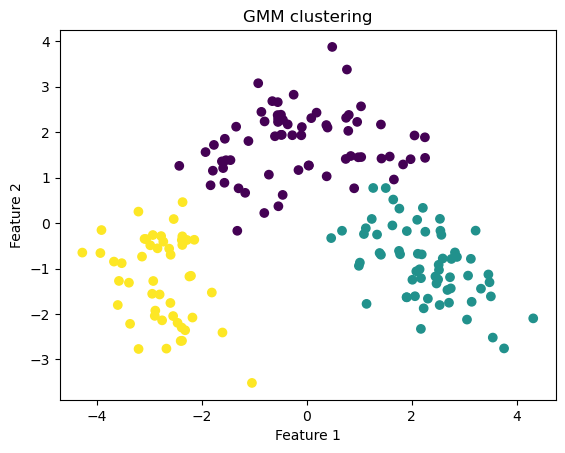

In [35]:
#PCA
pca=PCA(n_components=2)
pca.fit(normalized_data)
x_pca = pca.transform(normalized_data)
x_pca.shape

#GMM
n_clusters = 3
gmm = core.MY_GMM()
means, covarience, weights = gmm.fit(x_pca, n_clusters,max_iter=100)
preds = gmm.predict(x_pca, means, covarience, weights)

#plot
plt.scatter(x_pca[:,0],x_pca[:,1], c=preds)
plt.title('GMM clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [57]:
score = silhouette_score(x_pca, preds)
print('Silhouette score for GMM after applying PCA on dataset =',score)

Silhouette score for GMM after applying PCA on dataset = 0.5581473461293219


Observations:  
After doing dimensionality reduction using PCA the Silhouette score is improved in both K means and GMM and the clusters are more clearly visible.